In [50]:
 # Name : Abhinav Samudrala
 # Student ID : 801366280
 # Email : asamudra@uncc.edu 
 # Homework 1

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
def load_data(file_name):
    data = pd.read_csv(file_name)
    return data

In [28]:
def preprocess_data(data):
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    m = len(X)
    X = np.hstack((np.ones((m, 1)), X))
    y = y.reshape(m, 1)
    return X, y

In [29]:
def calculate_loss(X, y, theta):
    m = y.shape[0]
    h = X @ theta
    error = h - y
    J = (1 / (2 * m)) * np.sum(error ** 2)
    return J

In [30]:
def linear_regression(X, y, theta, alpha, iterations):
    m = y.shape[0]
    loss_history = np.zeros(iterations)
    for i in range(iterations):
        h = X @ theta
        error = h - y
        gradient = (1 / m) * X.T @ error
        theta = theta - alpha * gradient
        loss_history[i] = calculate_loss(X, y, theta)
    return theta, loss_history

In [31]:
def plot_results(X, y, theta, loss_history, feature_name):
    plt.scatter(X[:, 1], y, label='Data Points')
    plt.plot(X[:, 1], X @ theta, color='red', label='Linear Regression')
    plt.xlabel(feature_name)
    plt.ylabel('Target')
    plt.title(f'Linear Regression Result ({feature_name})')
    plt.legend()

    plt.figure()
    plt.plot(range(iterations), loss_history, label='Loss')
    plt.grid()
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Loss per Iteration')
    plt.legend()

In [32]:
data = load_data('D3.csv')


In [33]:
X, y = preprocess_data(data)


In [34]:
iterations = 3000
alpha = 0.01
theta = np.zeros((X.shape[1], 1))
theta, loss_history = linear_regression(X, y, theta, alpha, iterations)

Theta for Feature1: [-1.96691398]
Theta for Bias Term: [5.05362928]


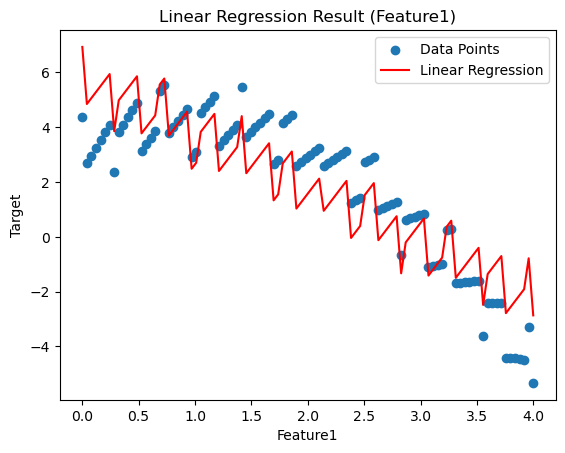

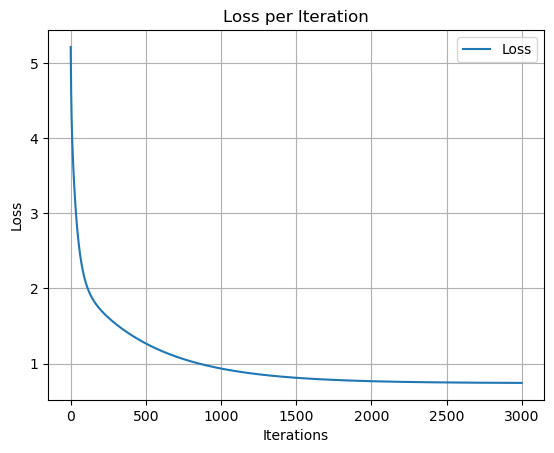

In [35]:
print('Theta for Feature1:', theta[1])
print('Theta for Bias Term:', theta[0])
plot_results(X, y, theta, loss_history, 'Feature1')

In [36]:
iterations = 1500
alpha = 0.08
theta = np.zeros((X.shape[1], 1))
theta, loss_history = linear_regression(X, y, theta, alpha, iterations)

Theta for Feature2: [-2.00371481]
Theta for Bias Term: [5.31413559]


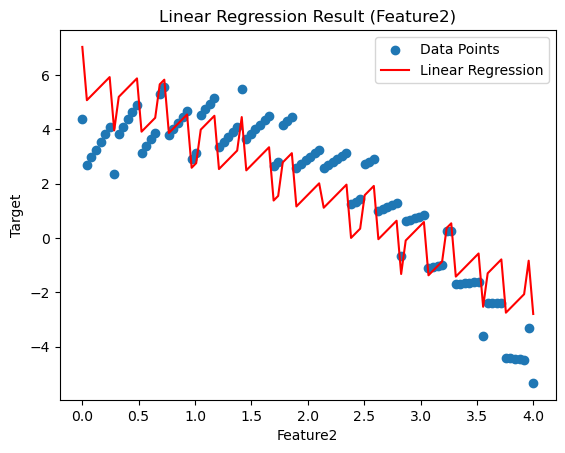

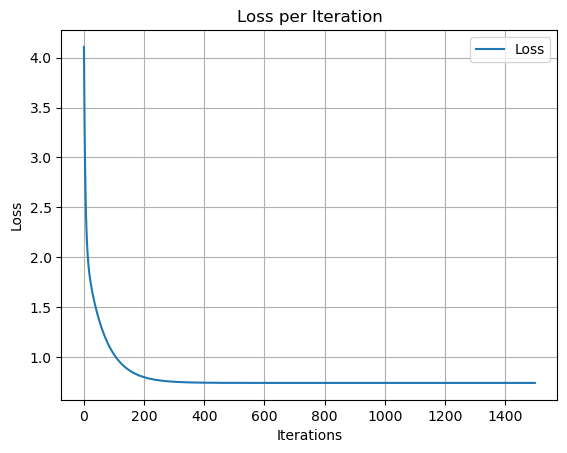

In [37]:
print('Theta for Feature2:', theta[1])
print('Theta for Bias Term:', theta[0])
plot_results(X, y, theta, loss_history, 'Feature2')

In [38]:
iterations = 3000
alpha = 0.01
theta = np.zeros((X.shape[1], 1))
theta, loss_history = linear_regression(X, y, theta, alpha, iterations)


Theta for Feature3 = [[ 5.05362928]
 [-1.96691398]
 [ 0.57561561]
 [-0.22741231]]


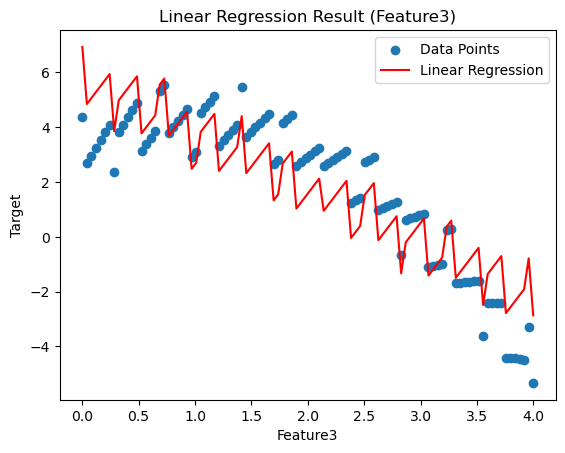

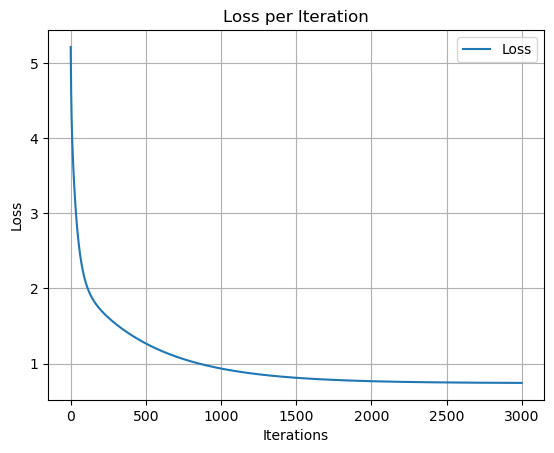

In [39]:
print('Theta for Feature3 =', theta)
plot_results(X, y, theta, loss_history, 'Feature3')

In [40]:
iterations = 5000
alpha = 0.05
theta = np.ones((X.shape[1], 1)) * 0.5
theta, loss_history = linear_regression(X, y, theta, alpha, iterations)

In [41]:
print('Final theta for All Features:', theta)
print('Final loss:', loss_history[-1])

Final theta for All Features: [[ 5.31416717]
 [-2.00371927]
 [ 0.53256334]
 [-0.26560187]]
Final loss: 0.7384642415682943


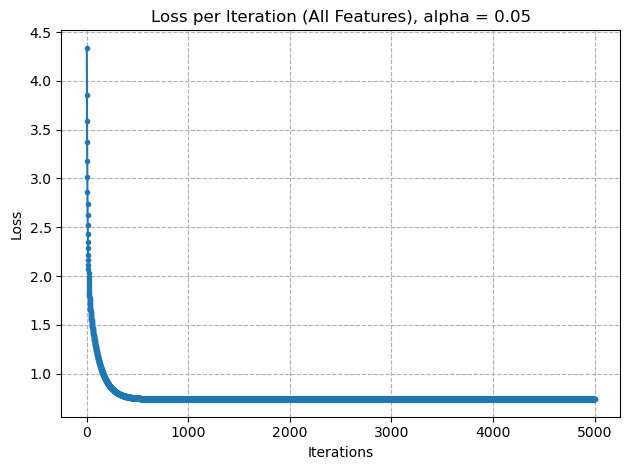

In [42]:
plt.figure()
plt.plot(range(1, iterations + 1), loss_history, marker='o', markersize=3)
plt.grid(linestyle='--')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss per Iteration (All Features), alpha = 0.05')
plt.tight_layout()

In [43]:
X_test = np.array([[1, 1, 1, 1], [1, 2, 0, 4], [1, 3, 2, 1]])
predictions = X_test.dot(theta)

In [44]:
for i, prediction in enumerate(predictions):
    print(f'Prediction {i+1} (Features: {X_test[i,1:]}) = {prediction}')

Prediction 1 (Features: [1 1 1]) = [3.57740937]
Prediction 2 (Features: [2 0 4]) = [0.24432117]
Prediction 3 (Features: [3 2 1]) = [0.10253417]
